In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
emissions = pd.read_csv('GCB2022v27_MtCO2_flat.csv')

In [4]:
emissions.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
emissions.isna().any()

Country               False
ISO 3166-1 alpha-3     True
Year                  False
Total                  True
Coal                   True
Oil                    True
Gas                    True
Cement                 True
Flaring                True
Other                  True
Per Capita             True
dtype: bool

In [6]:
#check for the countries with missing data
emissions[emissions['ISO 3166-1 alpha-3'].isna()== True].head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
19312,French Equatorial Africa,NaN,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19313,French Equatorial Africa,NaN,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19314,French Equatorial Africa,NaN,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19315,French Equatorial Africa,NaN,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19316,French Equatorial Africa,NaN,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
countries = list(emissions[emissions['ISO 3166-1 alpha-3'].isna()==True]['Country'].unique())

In [8]:
emissions = emissions[~emissions['Country'].isin(countries)]

In [13]:
#Created a pivot table that shows the mean values in dataframe grouped by country and iso columns
emissions = emissions.pivot_table(index=['Country', 'ISO 3166-1 alpha-3'], aggfunc='mean').reset_index()

In [14]:
#looked for missing data again and can see it is severely reduced
emissions.isna().sum()

Country                 0
ISO 3166-1 alpha-3      0
Cement                  1
Coal                    1
Flaring                 1
Gas                     1
Oil                     0
Other                 179
Per Capita              1
Total                   0
Year                    0
dtype: int64

In [15]:
emissions.describe()

,Cement,Coal,Flaring,Gas,Oil,Other,Per Capita,Total,Year
count,225.000000,225.000000,225.000000,225.000000,226.000000,47.000000,225.000000,226.000000,226.0
mean,3.495216,34.934302,1.811227,15.138544,34.644040,9.528143,4.519662,58.448769,1885.5
std,23.981937,232.320951,17.176521,123.915838,249.722626,37.945783,12.121094,443.395505,0.0
min,0.000000,0.000000,0.000000,0.000000,0.005807,0.000000,0.000000,0.000566,1885.5
25%,0.000000,0.000000,0.000000,0.000000,0.493674,0.517973,0.466443,0.143835,1885.5
50%,0.206668,0.142759,0.000354,0.032256,2.332878,1.140287,1.888119,1.094320,1885.5
75%,0.868791,4.012198,0.133343,2.745829,10.327228,4.016204,4.614901,10.840402,1885.5
max,317.372713,2956.581079,256.309522,1814.698722,3625.609201,251.782569,160.754720,6385.772167,1885.5


<AxesSubplot:xlabel='Country', ylabel='Total'>

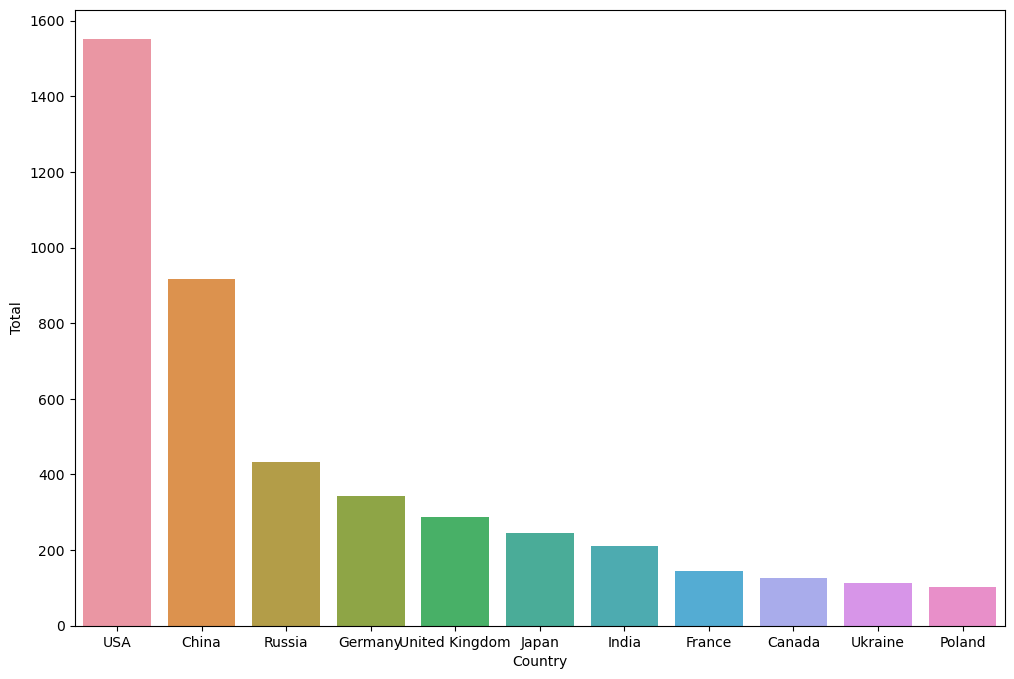

In [16]:
#Here I want to see the total emissions by country 

countries = emissions[(emissions['Country'] != 'Global')&(emissions['Country'] !='International Transport')]
countries = countries[['Country', 'Total', 'Year']].sort_values(by=['Total'], ascending=False)
sns.set_palette(palette = 'dark')

#change size: 

plt.figure(figsize = (12,8))

#seaborn barplot

sns.barplot(x= 'Country', y ='Total', data = countries.head(11))


In [35]:
emissions = emissions[emissions['Year'] > 2012]

In [16]:
countries= countries[countries['Year'] > 1900]
print(countries.shape)

(0, 3)


In [17]:
countries.columns

Index(['Country', 'Total', 'Year'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

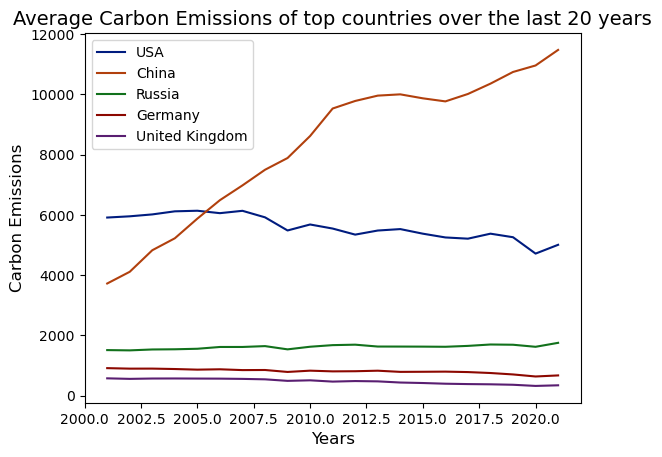

In [19]:
#Average Carbon Emissions of top countries over the last 20 years
countries = pd.read_csv('GCB2022v27_MtCO2_flat.csv')
countries= countries[countries['Year'] > 2000]
sns.lineplot(countries[countries['Country'] == 'USA']['Year'], countries[countries['Country'] == 'USA']['Total'], label = 'USA')
sns.lineplot(countries[countries['Country'] == 'China']['Year'], countries[countries['Country'] == 'China']['Total'], label = 'China')
sns.lineplot(countries[countries['Country'] == 'Russia']['Year'], countries[countries['Country'] == 'Russia']['Total'], label = 'Russia')
sns.lineplot(countries[countries['Country'] == 'Germany']['Year'], countries[countries['Country'] == 'Germany']['Total'], label = 'Germany')
sns.lineplot(countries[countries['Country'] == 'United Kingdom']['Year'], countries[countries['Country'] == 'United Kingdom']['Total'], label = 'United Kingdom')

plt.title('Average Carbon Emissions of top countries over the last 20 years', size = 14)
plt.ylabel('Carbon Emissions', size = 12)
plt.xlabel('Years', size = 12);


In [18]:
countries.shape

(224, 3)

In [50]:
emissions.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Cement', 'Coal', 'Flaring', 'Gas',
       'Oil', 'Other', 'Per Capita', 'Total', 'Year'],
      dtype='object')